# Making critical difference plot to compare models

https://medium.com/@catur.supriyanto/how-to-visualize-the-nemenyi-and-bonferroni-dunn-diagrams-in-python-aa6a311f1cee

Used for inspiration

In [1]:
import pickle
import sys
import os
import Orange 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import plot_cd
module_path = os.path.abspath(os.path.join('../..'))

a_file = open(module_path + '/src/dictionaries/datasets_results_lr_helper.pkl', 'rb')
cd_dict = pickle.load(a_file)

cd= 2.490456068388163


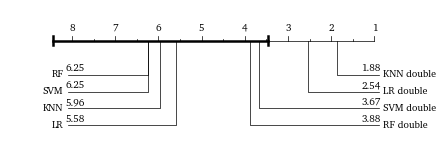

In [2]:
names = pd.DataFrame(cd_dict).rank(ascending = False).mean(axis = 1).index.values
avranks = pd.DataFrame(cd_dict).rank(ascending = False).mean(axis = 1).values
cd = Orange.evaluation.compute_CD(avranks, 14,alpha='0.05', test='bonferroni-dunn') #tested on 14 datasets 
print('cd=',cd)
plot_cd.graph_ranks_2(avranks, names, reverse = True, cd=cd, width=10, textspace=1.5, cdmethod=0)
plt.savefig(module_path + '/figures/double_cd_plot.pdf',bbox_inches='tight')

['KNN' 'KNN double' 'SVM' 'SVM double' 'LR' 'LR double' 'RF' 'RF double']
RF            6.250000
SVM           6.250000
KNN           5.958333
LR            5.583333
RF double     3.875000
SVM double    3.666667
LR double     2.541667
KNN double    1.875000
dtype: float64


/home/andrine/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


2.490456068388163


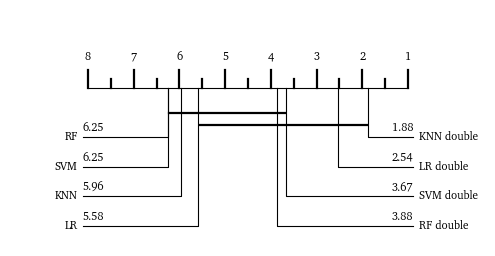

In [38]:
new_dataset = []
datasets = {}
for dataset, val in cd_dict.items():
    for clf, acc in val.items():
        new_dataset.append([clf, dataset, acc])
data_dict_double = pd.DataFrame(data = new_dataset, columns = ['classifier_name', 'dataset_name', 'accuracy'])
plot_cd.draw_cd_diagram(df_perf=data_dict_double, title='Accuracy', labels=True, filename = 'double_cd_plot.pdf')
print(cd)

['TS-CHIEF' 'HIVE-COTE v1.0' 'ROCKET' 'InceptionTime' 'STC' 'ResNet'
 'ProximityForest' 'WEASEL' 'S-BOSS' 'cBOSS' 'BOSS' 'RISE' 'TSF' 'Catch22']
Catch22            11.435185
TSF                10.175926
RISE                9.944444
BOSS                8.814815
cBOSS               8.759259
S-BOSS              7.976852
WEASEL              7.754630
ProximityForest     7.555556
ResNet              7.263889
STC                 7.092593
InceptionTime       5.287037
ROCKET              4.606481
HIVE-COTE v1.0      4.175926
TS-CHIEF            4.157407
dtype: float64


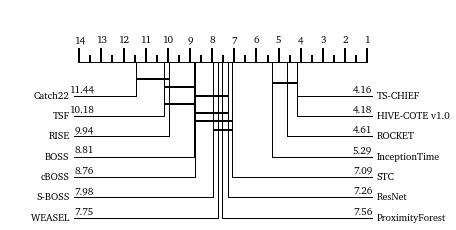

In [4]:
df2 = pd.read_csv(module_path + '/research/MegaComparison/ACC/TEST/TESTACC_MEANS.csv')
test = df2.to_dict()
new_dataset = []
datasets = {}
for clf, val in test.items():
    if clf == 'TESTACC':
        for idx, dataset in val.items():
            datasets[idx] = dataset
    else:
        for idx , acc in val.items():
            new_dataset.append([clf, datasets[idx], acc])
data_dict_mega = pd.DataFrame(data = new_dataset, columns = ['classifier_name', 'dataset_name', 'accuracy'])
plot_cd.draw_cd_diagram(df_perf=data_dict_mega, title='Accuracy', labels=True, filename = 'mega_cd_plot.pdf')

['ROCKET' 'ResNet' 'Catch22' 'cBOSS' 'WEASEL' 'TSF' 'BOSS' 'RISE' 'S-BOSS'
 'ProximityForest' 'InceptionTime' 'TS-CHIEF' 'STC' 'HIVE-COTE v1.0']
HIVE-COTE v1.0     13.453704
STC                12.231481
TS-CHIEF           12.055556
InceptionTime      10.787037
ProximityForest     9.388889
S-BOSS              9.342593
RISE                7.351852
BOSS                6.814815
TSF                 6.787037
WEASEL              5.861111
cBOSS               4.240741
Catch22             2.574074
ResNet              2.425926
ROCKET              1.685185
dtype: float64


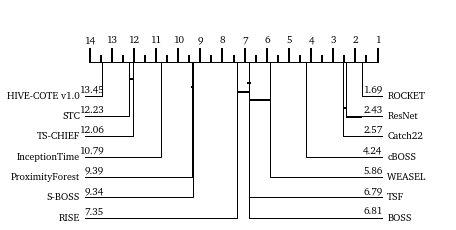

In [5]:
df2 = pd.read_csv(module_path + '/research/MegaComparison/TimingsRAW/TRAIN/TRAINTrainTimes_RANKS.csv')
test = df2.to_dict()
new_dataset = []
datasets = {}
for clf, val in test.items():
    if clf == 'TRAINTrainTimesRANKS':
        for idx, dataset in val.items():
            datasets[idx] = dataset
    else:
        for idx , acc in val.items():
            new_dataset.append([clf, datasets[idx], acc])
data_dict_mega = pd.DataFrame(data = new_dataset, columns = ['classifier_name', 'dataset_name', 'accuracy'])
plot_cd.draw_cd_diagram(df_perf=data_dict_mega, title='Accuracy', labels=True, filename = 'mega_cd_plot_time.pdf', acending  = True)